## Netflix Movies and TV Shows - Kaggle

### 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('netflix.csv')
del df['show_id'], df['description'], df['date_added'], df['rating'], df['cast']  # 필요없는 열 삭제
df.head()

,type,title,director,country,release_year,duration,listed_in
0,TV Show,3%,NaN,Brazil,2020,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Movie,7:19,Jorge Michel Grau,Mexico,2016,93 min,"Dramas, International Movies"
2,Movie,23:59,Gilbert Chan,Singapore,2011,78 min,"Horror Movies, International Movies"
3,Movie,9,Shane Acker,United States,2009,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Movie,21,Robert Luketic,United States,2008,123 min,Dramas


### TV show와 Movie의 비중을 파이차트로 나타내기

In [2]:
df.groupby('type').count()

,title,director,country,release_year,duration,listed_in
type,,,,,,
Movie,5377,5214,5147,5377,5377,5377
TV Show,2410,184,2133,2410,2410,2410


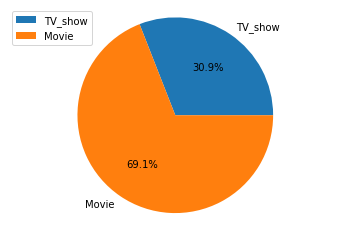

In [3]:
import matplotlib.pyplot as plt

tv_shows = df.groupby('type').count()['title'][1] / len(df)
movies = df.groupby('type').count()['title'][0] / len(df)
plt.pie([tv_shows, movies], labels=['TV_show', 'Movie'], autopct='%.1f%%')
plt.legend()
plt.axis('equal')
plt.show()

### 국가 별 콘텐츠를 막대그래프로 나타내기

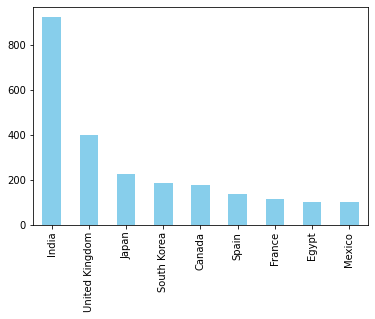

In [7]:
# 전체
df.country.value_counts()[1:10].sort_values(ascending=False).plot(kind='bar', color='skyblue');  # 상위 10개 나라 출력

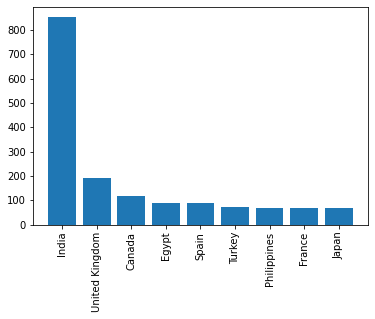

In [8]:
# 영화
MOVIE = df.groupby('type')['country'].value_counts()['Movie'][1: 10]
plt.bar(MOVIE.index, MOVIE)
plt.xticks(rotation=90)  # x축 이름을 90도 회전
plt.show()

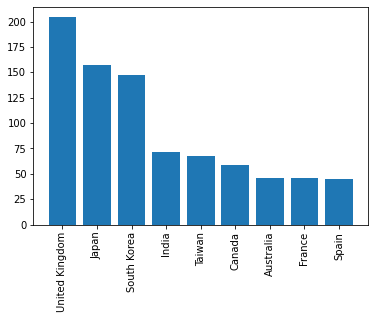

In [9]:
# TV show
TV_show = df.groupby('type')['country'].value_counts()['TV Show'][1: 10]
plt.bar(TV_show.index, TV_show)
plt.xticks(rotation=90)
plt.show()

### 작품 수 상위 20명의 director

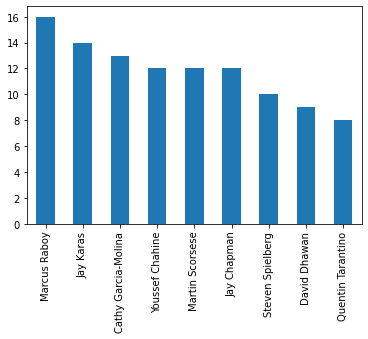

In [10]:
# 전체
df.director.value_counts()[1:10].sort_values(ascending=False).plot(kind='bar');

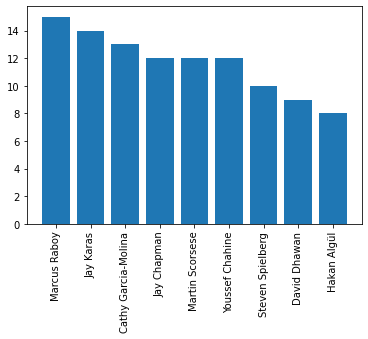

In [11]:
# 영화 감독
MOVIE = df.groupby('type')['director'].value_counts()['Movie'][1: 10]
plt.bar(MOVIE.index, MOVIE)
plt.xticks(rotation=90)  # x축 이름을 90도 회전
plt.show()

### 개봉 년도 콘텐츠 수

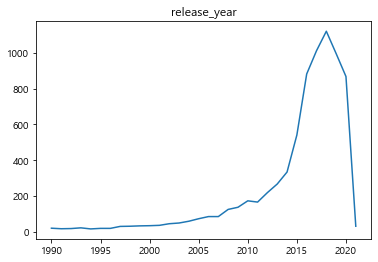

In [41]:
year = df.groupby('release_year')['title'].count()  # 년도를 기준으로 그룹화 한 후 제목을 count
year = year[year.index >= 1990]  # index = year가 1990이상인 것만 추출

plt.rc('font', family='Malgun Gothic')
plt.plot(year)
plt.title('release_year')
plt.show()